# ADS-505 Team 4 Final Project

Dingyi Duan, Juliet Sieland-Harris, Katie Hu

10/18/2021

### Problem Statement

https://github.com/katie-hu/Bank_Marketing

#### Background

 The primary user of this data is the banking institution. The business requires this data to make more strategic marketing decisions that can improve the user’s finances. Currently, the user needs to understand the impacts telemarketing has towards potential clients. To validate use of this marketing campaign, a data mining project is approved to be an ideal solution to use the data provided to develop an algorithm to predict whether or not telemarketing will result in a subscription to a term deposit.

### Import Libraries and Data Set

In [1]:
# Import Libraries

import pandas as pd
import math
import statistics
import seaborn as sns
import datetime
from datetime import date
import matplotlib.pylab as plt
import numpy as np
import statsmodels.api as sm
import random
from matplotlib.pyplot import figure
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary, gainsChart, stepwise_selection, regressionSummary, AIC_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Data Set

url = 'https://raw.githubusercontent.com/katie-hu/Bank_Marketing/Katie/Dataset/bank.csv'
bank_df = pd.read_csv(url)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#### Predictor Variables
1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")
9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

#### Output variable (desired target):
17. y - has the client subscribed a term deposit? (binary: "yes","no")

# 
### Exploratory Data Analysis (EDA)

The dataset consists of 4521 entries with 16 features and a binary y output. Most of the features are numeric variables that include binary and discrete values while the rest contains various categorical data that in type of integers and objects.

# 

In [3]:
# Find Number of Columns and Rows in Data Set

bank_df.shape

(4521, 17)

In [4]:
# Find Type of Variables

bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# 
There is no missing values or nulls in this dataset. However, we did see some imbalance and outliers that stand out in the numeric variables. 
# 

In [5]:
# Descriptive Statistics

bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
# Column Names

bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
# Find any missing values

bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# Create new dataframe that will be cleaned

bank = pd.DataFrame(data = bank_df)

# 
It is important to check for the response rate so we take into consideration of the imbalance of the classes.
#### 

In [9]:
# Check positive response

print((bank['y'] == 'yes').sum())

# Check for response rate

print(100*(bank['y'] == 'yes').sum() / len(bank))

521
11.523999115239992


Knowing the target variable has imbalanced classes, we can think of ways of adjustment towards our final evaluation.
# 

In order for better fitment of the models, we convert the binary features in to numerical values, including the target variable.

In [10]:
# Change all yes and no to binary 0,1 values

bank['y'] = (bank['y']=='yes').astype(int)  # changing yes to 1 and no to 0
bank['default'] = (bank['default']=='yes').astype(int)  # changing yes to 1 and no to 0
bank['housing'] = (bank['housing']=='yes').astype(int)  # changing yes to 1 and no to 0
bank['loan'] = (bank['loan']=='yes').astype(int)  # changing yes to 1 and no to 0
bank['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

# 
Histograms can help us visualize the distribution of our data and to help us understand and further to decide the importance and relationships between each feature to the target variable.

From the histograms below, we see a number of features such as 'duration', 'campaign', 'pdays' and 'previous' are heavily imbalanced as numeric data, we can either perform log transformation or square root transformation to normalize such data or bin them to convert them into categorical variables.
# 

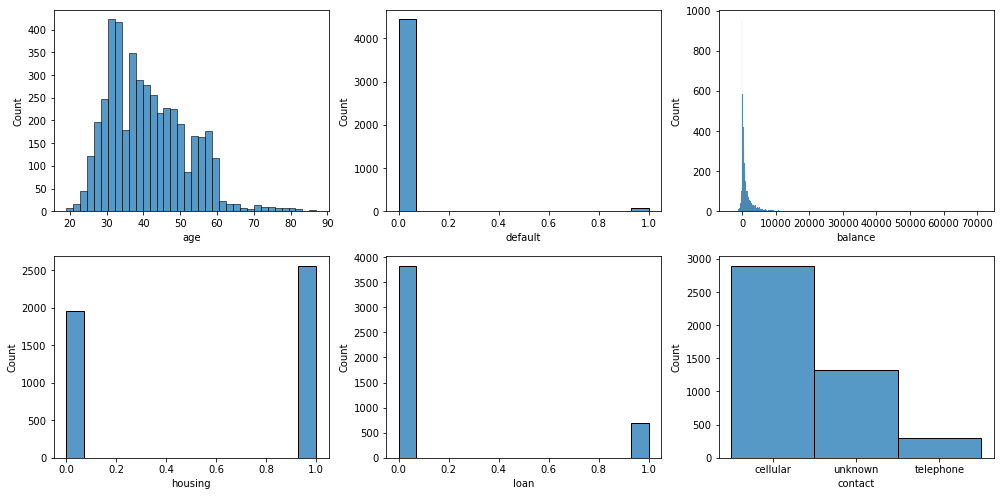

In [11]:
# Look into distribution of variables
f, axs = plt.subplots(2, 3, figsize = (14,7))

sns.histplot(data = bank, x = 'age', ax = axs[0,0])
sns.histplot(data = bank, x = 'default', ax = axs[0,1])
sns.histplot(data = bank, x = 'balance', ax = axs[0,2])
sns.histplot(data = bank, x = 'housing', ax = axs[1,0])
sns.histplot(data = bank, x = 'loan', ax = axs[1,1])
sns.histplot(data = bank, x = 'contact', ax = axs[1,2])


plt.tight_layout()

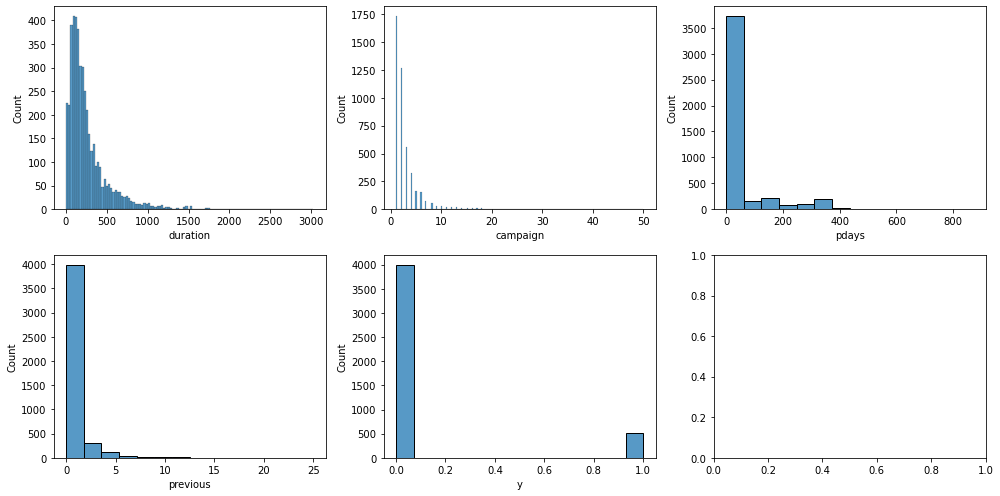

In [12]:
#Look into distribution of variables
f, axs = plt.subplots(2, 3, figsize = (14,7))

sns.histplot(data = bank, x = 'duration', ax = axs[0,0])
sns.histplot(data = bank,x = 'campaign', ax = axs[0,1])
sns.histplot(data = bank, x = 'pdays', ax = axs[0,2])
sns.histplot(data = bank, x = 'previous', ax = axs[1,0])
sns.histplot(data = bank, x = 'y', ax = axs[1,1])

plt.tight_layout()

# 
To better understand the relationships between the features, we want to look at the correlations between each other and decide if we want to drop any features that are highly correlated to each other.
# 

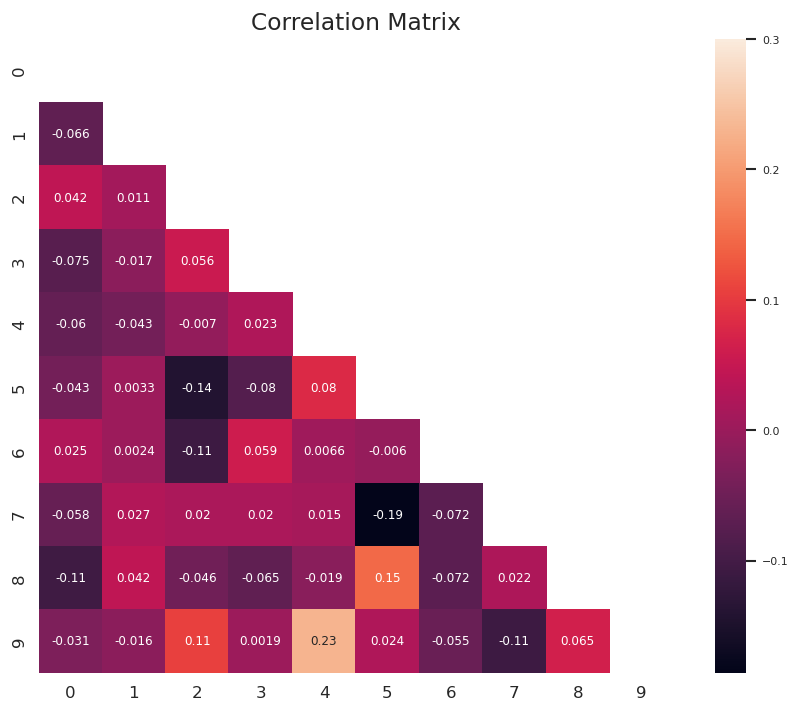

In [13]:
# Find which variables have the highest correlation
%matplotlib inline

corr = np.corrcoef(np.random.randn(10,200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (9,7), dpi = 120)
    sns.set(font_scale = .6)
    ax = sns.heatmap(corr, mask = mask, vmax = .3, square = True, annot = True)
    ax.set_title('Correlation Matrix', fontsize = 14)

In [14]:
# Set Up Normalized Bar Plots for categorical variables

# Marital

crosstab_marital = pd.crosstab(bank['marital'], bank['y'])
crosstab_marital_norm = crosstab_marital.div(crosstab_marital.sum(axis = 1), axis = 0)

# Job

crosstab_job = pd.crosstab(bank['job'], bank['y'])
crosstab_job_norm = crosstab_job.div(crosstab_job.sum(axis=1), axis = 0)

# Education

crosstab_education = pd.crosstab(bank['education'], bank['y'])
crosstab_education_norm = crosstab_education.div(crosstab_education.sum(axis=1), axis = 0)

# Contact

crosstab_contact = pd.crosstab(bank['contact'], bank['y'])
crosstab_contact_norm = crosstab_contact.div(crosstab_contact.sum(axis=1), axis = 0)

# Month

crosstab_month = pd.crosstab(bank['month'], bank['y'])
crosstab_month_norm = crosstab_month.div(crosstab_month.sum(axis=1), axis = 0)

# Day

crosstab_day = pd.crosstab(bank['day'], bank['y'])
crosstab_day_norm = crosstab_day.div(crosstab_day.sum(axis=1), axis = 0)

In [15]:
params = {'legend.fontsize': 12,
         'axes.labelsize': 12,
         'axes.titlesize': 12,}
plt.rcParams.update(params)

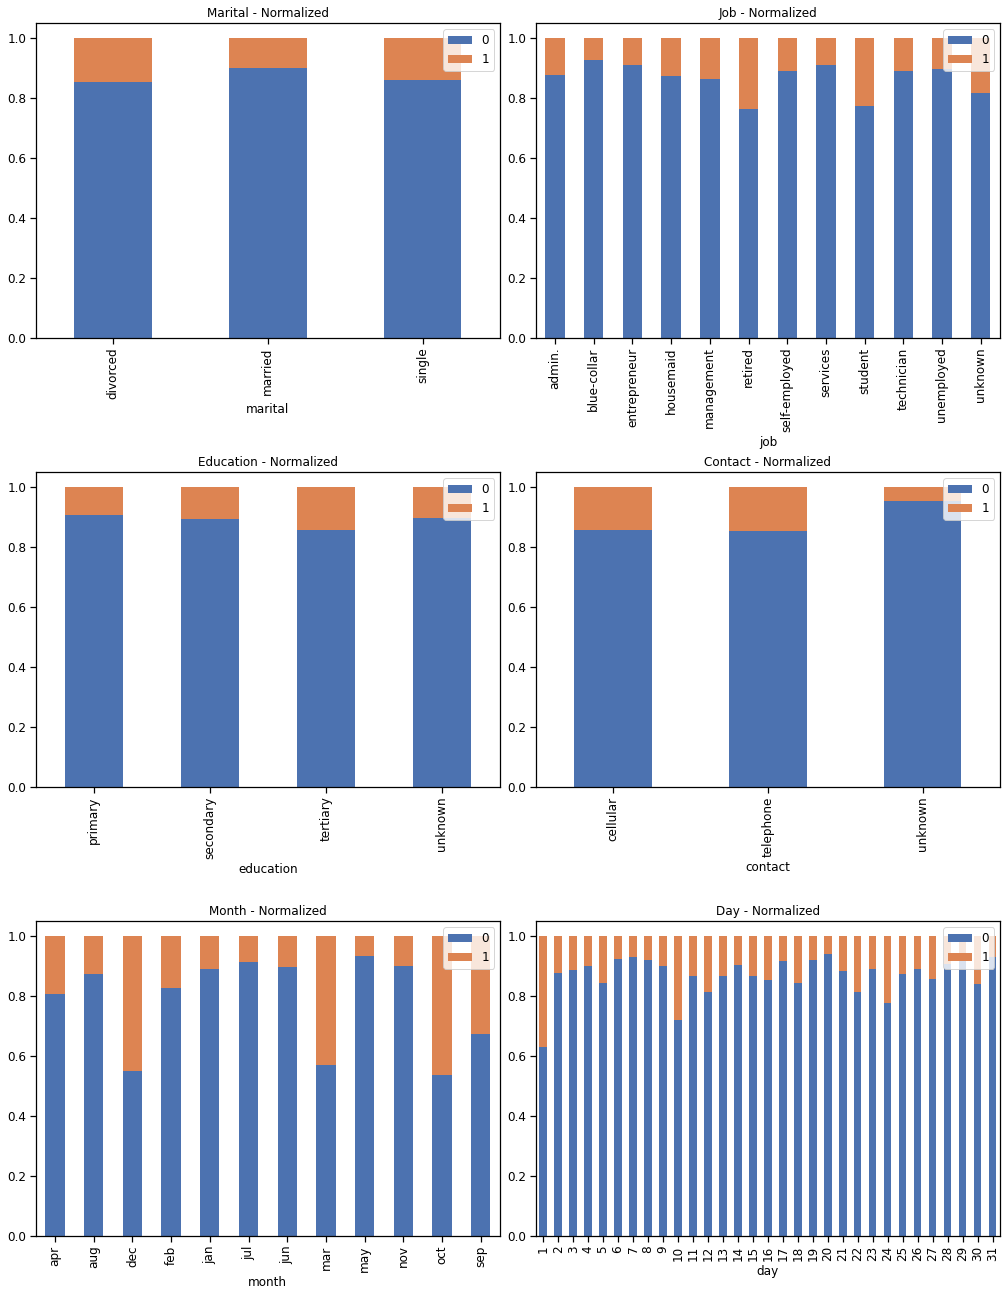

In [16]:
fig = plt.figure(figsize = (14, 18))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

plot_marital = crosstab_marital_norm.plot(kind = 'bar', stacked = True, title = 'Marital - Normalized', fontsize = 12, ax  = ax1)
plot_job = crosstab_job_norm.plot(kind = 'bar', stacked = True, title = 'Job - Normalized', fontsize = 12, ax  = ax2)
plot_education = crosstab_education_norm.plot(kind = 'bar', stacked = True, title = 'Education - Normalized', fontsize = 12, ax  = ax3)
plot_contact = crosstab_contact_norm.plot(kind = 'bar', stacked = True, title = 'Contact - Normalized', fontsize = 12, ax  = ax4)
plot_month = crosstab_month_norm.plot(kind = 'bar', stacked = True, title = 'Month - Normalized', fontsize = 12, ax  = ax5)
plot_day = crosstab_day_norm.plot(kind = 'bar', stacked = True, title = 'Day - Normalized', fontsize = 12, ax  = ax6)

fig.tight_layout(pad = 1)
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')
ax4.legend(loc = 'upper right')
ax5.legend(loc = 'upper right')
ax6.legend(loc = 'upper right')

### Variable Conversion

Based on normalized charts, `job`, `month`, and `day` stand out needing further exploration. 

- 'job' with a wide range of job occupations, it would make more sense if we categorize them into less caregories.
- 'month' is a twelve classes categorical variables, we will treat them numerical for now.
- 'day' has a large number of unique values and are therefore less useful.

Variables `month`, `day`, `job` will be binned and `education`is fairly well-balanced which will changed into ordinal values. `contact` will be turned into nominal values.

<AxesSubplot:title={'center':'Binned by Jobs - Normalized'}, xlabel='job'>

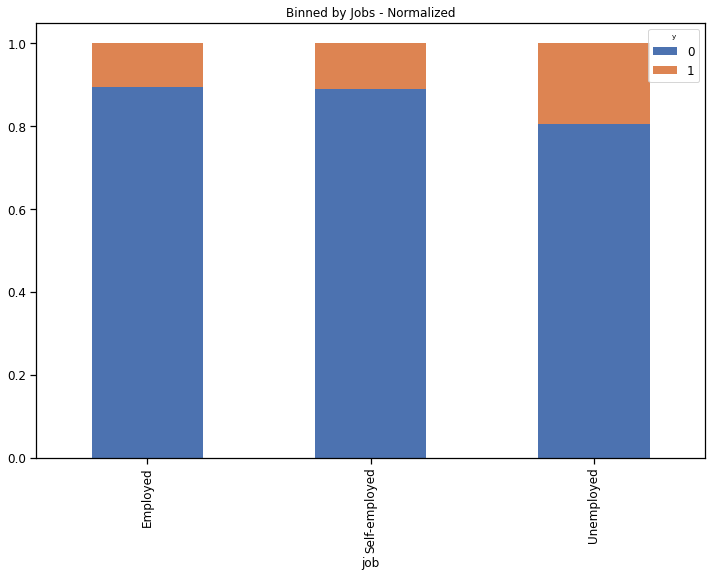

In [17]:
# Bin Jobs into Employed, Unemployed, and Self-Employed
bank['job'] = bank['job'].replace({'management': 'Employed', 'blue-collar': 'Employed',
                                 'technician': 'Employed', 'admin.': 'Employed',
                                 'services': 'Employed', 'retired': 'Unemployed',
                                 'self-employed': 'Self-employed', 'entrepreneur':'Employed',
                                 'unemployed': 'Unemployed', 'housemaid': 'Employed',
                                 'student': 'Unemployed', 'unknown': 'Employed'})

# Normalized Job by Bins Chart

crosstab_job = pd.crosstab(bank['job'], bank['y'])
crosstab_job_norm = crosstab_job.div(crosstab_job.sum(axis=1), axis = 0)
crosstab_job_norm.plot(kind = 'bar', stacked = True, title = 'Binned by Jobs - Normalized', fontsize = 12, figsize = (12, 8))

<AxesSubplot:title={'center':'Binned by Days - Normalized'}, xlabel='day'>

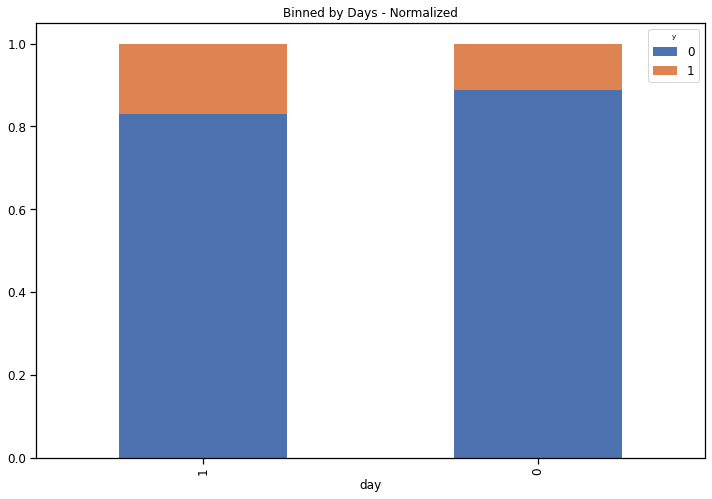

In [18]:
# Change Days to First Day of the Month and All Other Days

b_day = [1, 2, 999]
l_day = ['1', '0']

bank['day'] = pd.to_numeric(bank['day'])
bank['day'] = pd.cut(bank['day'], bins = b_day, labels = l_day, include_lowest = True)

# Normalized Day by Bins Chart

crosstab_day = pd.crosstab(bank['day'], bank['y'])
crosstab_day_norm = crosstab_day.div(crosstab_day.sum(axis=1), axis = 0)
crosstab_day_norm.plot(kind = 'bar', stacked = True, title = 'Binned by Days - Normalized', fontsize = 12, figsize = (12, 8))

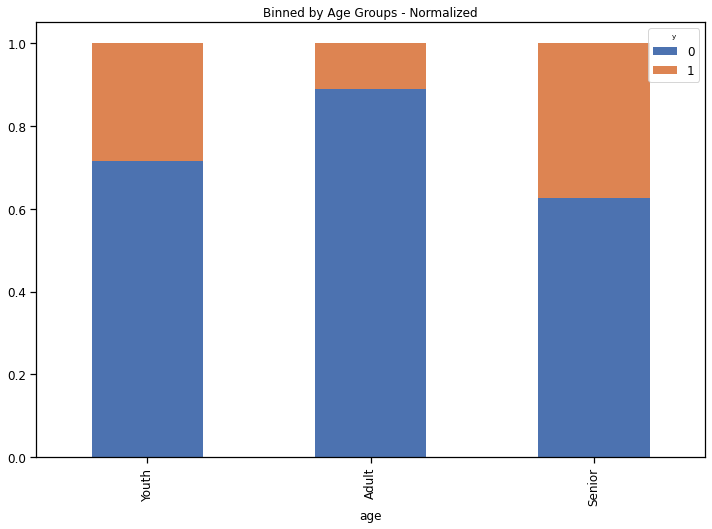

In [19]:
# Change age into groups based on range

b_age = [0, 21, 65, 99999]
l_age = ['Youth', 'Adult', 'Senior']

bank['age'] = pd.to_numeric(bank['age'])
bank['age'] = pd.cut(bank['age'], bins = b_age, labels = l_age, include_lowest = True)

# Normalized Day by Bins Chart

crosstab_age = pd.crosstab(bank['age'], bank['y'])
crosstab_age_norm = crosstab_age.div(crosstab_age.sum(axis=1), axis = 0)
crosstab_age_norm.plot(kind = 'bar', stacked = True, title = 'Binned by Age Groups - Normalized', fontsize = 12, figsize = (12, 8))

# Convert Categories into Numbers

bank['age'] = bank['age'].replace({'Youth': '0',
                                  'Adult': '1',
                                  'Senior': '2'})

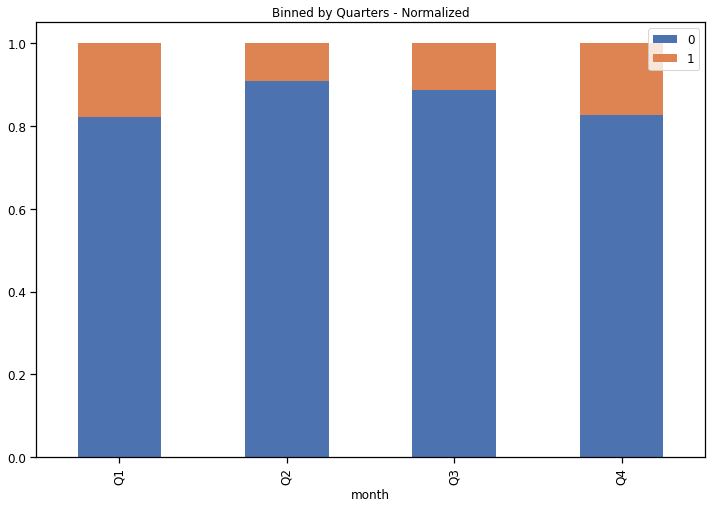

In [20]:
# Change months into groups based on a quarter system

bank['month'] = bank['month'].replace({'jan': '1','feb':'2','mar':'3','apr':'4','may':'5',
                                       'jun':'6','jul':'7','aug':'8','sep':'9','oct':'10',
                                       'nov':'11','dec':'12'
                                  })

bank['month'] = pd.to_numeric(bank['month'])

b_month = [0, 3, 6, 9, 12]
l_month = ['Q1','Q2','Q3','Q4']

bank['month'] = pd.to_numeric(bank['month'])
bank['month'] = pd.cut(bank['month'], bins = b_month, labels = l_month, include_lowest = True)

# Normalized Month by Bins Chart

crosstab_month = pd.crosstab(bank['month'], bank['y'])
crosstab_month_norm = crosstab_month.div(crosstab_month.sum(axis=1), axis = 0)
crosstab_month_norm.plot(kind = 'bar', stacked = True, title = 'Binned by Quarters - Normalized', fontsize = 12, figsize = (12, 8))

# Convert Categories into Numbers

bank['month'] = bank['month'].replace({'Q1': '1',
                                       'Q2': '2',
                                       'Q3': '3',
                                       'Q4': '4'})

plt.legend(loc = 'upper right')

# 
Since `job` and `marital` have fewer categories, they will be turned into dummy variables.
# 

In [21]:
# Turn categorical variables job and marital into dummy variables

cat_df = bank[['job', 'marital']]
dummy = pd.get_dummies(cat_df)

# Merge back into dataset

bank = pd.concat([bank,dummy], axis = 1)

# Drop job and marital original

bank = bank.drop(['job', 'marital'], axis = 1)

# 
Since 'pdays' involves with "-1" for "Never contacted" and any positive numbers are days since last contacted.

If left be, 'pdays' will be useless due to large amount of unique values. So we can bin it and treat it as a binary variable.

Also, converting 'education', 'contact' and 'poutcome' to numerical from object for better model fitment.
# 

In [22]:
# Change pdays to integer and bins

b = [-1, 0, 99999]
l = ['0', '1']

bank['pdays'].astype(int)
bank['pdays'] = pd.cut(bank['pdays'], bins = b, labels = l, include_lowest = True)


# Change Education Variable to Ordinal

bank['education'] = bank['education'].replace({'primary': '0',
                                              'secondary':'0.25',
                                              'tertiary':'0.5',
                                              'unknown':'1'})
bank['education'].astype(float)


# Change Contact and P Outcome to Nominal Values

bank['contact'] = bank['contact'].replace({'cellular': '0',
                                           'telephone':'1',
                                           'unknown':'2'
                                  })

bank['poutcome'] = bank['poutcome'].replace({'failure': '0',
                                             'other':'1',
                                             'success':'2',
                                             'unknown':'3'
                                  })

In [23]:
# Change Variable of 'y' to 'deposit'

bank = bank.rename(columns = {'y': 'deposit'})

In [24]:
# Set Predictors and Outcome

predictors = list(bank.columns)
outcome = 'deposit'
predictors.remove(outcome)

#### Train, Valid, Test Split Data

Parameters: 
- Train .4
- Valid .35
- Test .25
- Random State 1

In [25]:
# Helper Functions

def confusionMatrices(model, title):
    print(title + ' - training results')
    classificationSummary(train_y, model.predict(train_X))
    print(title + ' - validation results')
    valid_pred = model.predict(valid_X)
    classificationSummary(valid_y, valid_pred)

In [26]:
# Train, Valid, Test Split Data

train, temp = train_test_split(bank, train_size=1700, random_state=1)
valid, test = train_test_split(temp, train_size=1488, random_state=1)

print('Training   : ', train.shape)
print('Validation : ', valid.shape)
print('Test : ', test.shape)

Training   :  (1700, 21)
Validation :  (1488, 21)
Test :  (1333, 21)


In [27]:
# Set Variables

train_X = train.drop(['deposit'], 1)
train_y = train['deposit']

valid_X = valid.drop(['deposit'], 1)
valid_y = valid['deposit']


In [28]:
#Standardization

# train
train_X_norm = StandardScaler().fit_transform(train_X)

# valid
valid_X_norm = StandardScaler().fit_transform(valid_X)


### Logistic Regression

In [29]:
logit_reg = LogisticRegressionCV(penalty="l2", solver='lbfgs', cv = 5, max_iter = 5000)
logit_reg.fit(train_X_norm, train_y)
confusionMatrices(logit_reg, 'Logistic regression')

Logistic regression - training results
Confusion Matrix (Accuracy 0.1200)

       Prediction
Actual    0    1
     0    4 1496
     1    0  200
Logistic regression - validation results
Confusion Matrix (Accuracy 0.1203)

       Prediction
Actual    0    1
     0    8 1309
     1    0  171


### Classification Tree

In [30]:
dTree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 30, max_leaf_nodes = 10)
dTree.fit(train_X_norm, train_y)
confusionMatrices(dTree, 'Decision Tree')

Decision Tree - training results
Confusion Matrix (Accuracy 0.1176)

       Prediction
Actual    0    1
     0    0 1500
     1    0  200
Decision Tree - validation results
Confusion Matrix (Accuracy 0.1149)

       Prediction
Actual    0    1
     0    0 1317
     1    0  171


### Bagging

In [31]:
bagging = BaggingClassifier(dTree, max_samples = 0.5, max_features = 0.5)
bagging.fit(train_X_norm, train_y)
confusionMatrices(bagging, 'Bagged Decision Tree')

Bagged Decision Tree - training results
Confusion Matrix (Accuracy 0.8353)

       Prediction
Actual    0    1
     0 1363  137
     1  143   57
Bagged Decision Tree - validation results
Confusion Matrix (Accuracy 0.8192)

       Prediction
Actual    0    1
     0 1183  134
     1  135   36


### Adaboost

In [32]:
adaboost = AdaBoostClassifier(n_estimators = 100, base_estimator = dTree)
adaboost.fit(train_X_norm, train_y)
confusionMatrices(adaboost, 'Boosted Decision Tree')

Boosted Decision Tree - training results
Confusion Matrix (Accuracy 0.4682)

       Prediction
Actual   0   1
     0 736 764
     1 140  60
Boosted Decision Tree - validation results
Confusion Matrix (Accuracy 0.4852)

       Prediction
Actual   0   1
     0 663 654
     1 112  59


### Random Forest

In [33]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(train_X_norm, train_y)
confusionMatrices(rf, 'Random Forest Classifier')

Random Forest Classifier - training results
Confusion Matrix (Accuracy 0.2324)

       Prediction
Actual    0    1
     0  227 1273
     1   32  168
Random Forest Classifier - validation results
Confusion Matrix (Accuracy 0.2305)

       Prediction
Actual    0    1
     0  197 1120
     1   25  146


### Neural Network

#### Option 1

In [34]:
param_grid = {
    'hidden_layer_sizes': list(range(2, 10)),
}
neuralNet1 = MLPClassifier(activation = 'logistic', solver = 'lbfgs', random_state = 1, max_iter = 5000)

gridSearch = GridSearchCV(neuralNet1, param_grid, cv = 5, n_jobs = -1)
gridSearch.fit(train_X_norm, train_y)
neuralNet1 = gridSearch.best_estimator_

confusionMatrices(gridSearch, 'Neural Network')

Neural Network - training results
Confusion Matrix (Accuracy 0.5365)

       Prediction
Actual   0   1
     0 807 693
     1  95 105
Neural Network - validation results
Confusion Matrix (Accuracy 0.5397)

       Prediction
Actual   0   1
     0 703 614
     1  71 100


#### Option 2

In [35]:
scaleInput = MinMaxScaler()
scaleInput.fit(train_X_norm * 1.0)

neuralNet2 = MLPClassifier(hidden_layer_sizes = (10), activation = 'logistic', solver = 'lbfgs', max_iter = 5000,
                          random_state = 1)
neuralNet2.fit(scaleInput.transform(train_X_norm), train_y)

print('Neural Network - Training results')
classificationSummary(train_y, neuralNet2.predict(scaleInput.transform(train_X_norm)))
print('Neural Network - Validation results')
classificationSummary(valid_y, neuralNet2.predict(scaleInput.transform(valid_X_norm)))

Neural Network - Training results
Confusion Matrix (Accuracy 0.9476)

       Prediction
Actual    0    1
     0 1477   23
     1   66  134
Neural Network - Validation results
Confusion Matrix (Accuracy 0.8730)

       Prediction
Actual    0    1
     0 1251   66
     1  123   48


### Linear Discriminant Analysis

In [36]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(train_X_norm, train_y)
LDA_confusion = confusionMatrices(LDA, 'Linear Discriminant Analysis')

Linear Discriminant Analysis - training results
Confusion Matrix (Accuracy 0.1182)

       Prediction
Actual    0    1
     0    1 1499
     1    0  200
Linear Discriminant Analysis - validation results
Confusion Matrix (Accuracy 0.1163)

       Prediction
Actual    0    1
     0    2 1315
     1    0  171


### Evaluation Metrics

### Accuracy Score


Generally, we use accuracy score to check for correctly classified records. 


                            Accuracy = TP + TN / TP + TN + FP + FN



However, this the dataset is heavily imbalanced with 11.5% of positive response rate, this means if we take a blind guess for a negative response, we have a chance of 89% getting it right, so it won't be convincing to use accuracy score.


In [60]:
def accuracy(model):
    
    accuracy_train = accuracy_score(train_y, model.predict(train_X_norm))
    accuracy_valid = accuracy_score(valid_y, model.predict(valid_X_norm))
    
    return round(accuracy_train,3), round(accuracy_valid,3)

print('Accuracy score for Logistic Regression is:', accuracy(logit_reg))
print('Accuracy score for Decision Tree is:', accuracy(dTree))
print('Accuracy score for Bagging is:', accuracy(bagging))
print('Accuracy score for Boosting is:', accuracy(adaboost))
print('Accuracy score for Random Forest is:', accuracy(rf))
print('Accuracy score for Neural Network Option 1 is:', accuracy(gridSearch))
print('Accuracy score for Neural Network Option 2 is:', accuracy(neuralNet2))
print('Accuracy score for Linear Discriminant Analysis is:', accuracy(LDA))

Accuracy score for Logistic Regression is: (0.905, 0.897)
Accuracy score for Decision Tree is: (0.905, 0.89)
Accuracy score for Bagging is: (0.89, 0.89)
Accuracy score for Boosting is: (1.0, 0.86)
Accuracy score for Random Forest is: (1.0, 0.886)
Accuracy score for Neural Network Option 1 is: (0.916, 0.881)
Accuracy score for Neural Network Option 2 is: (0.867, 0.87)
Accuracy score for Linear Discriminant Analysis is: (0.904, 0.89)


### F1 Score
# 
F1 score, on the other hand, conveys the balance between the precision and the recall. This means that F1 score takes in considerations of True Positives and False Negatives, which can effectively measure the performance of a model on an imbalanced dataset.

                         F1 Score = TP  / ( TP + 1/2( FP + FN ) )

In [59]:
def f1(model):
    
    f1_train = f1_score(train_y, model.predict(train_X_norm), average = 'weighted')
    f1_valid = f1_score(valid_y, model.predict(valid_X_norm), average = 'weighted')
    
    return round(f1_train,2), round(f1_valid,2)

print('F1 score for Logistic Regression is:', f1(logit_reg))
print('F1 score for Decision Tree is:', f1(dTree))
print('F1 score for Bagging is:', f1(bagging))
print('F1 score for Boosting is:', f1(adaboost))
print('F1 score for Random Forest is:', f1(rf))
print('F1 score for Neural Network Option 1 is:', f1(gridSearch))
print('F1 score for Neural Network Option 2 is:', f1(neuralNet2))
print('F1 score for Linear Discriminant Analysis is:', f1(LDA))

F1 score for Logistic Regression is: (0.89, 0.88)
F1 score for Decision Tree is: (0.88, 0.86)
F1 score for Bagging is: (0.85, 0.84)
F1 score for Boosting is: (1.0, 0.86)
F1 score for Random Forest is: (1.0, 0.87)
F1 score for Neural Network Option 1 is: (0.91, 0.87)
F1 score for Neural Network Option 2 is: (0.86, 0.86)
F1 score for Linear Discriminant Analysis is: (0.9, 0.88)


# 
It is better for us to visualize the performance of each model to see the differences and pick our best performed one.

### Gains Chart

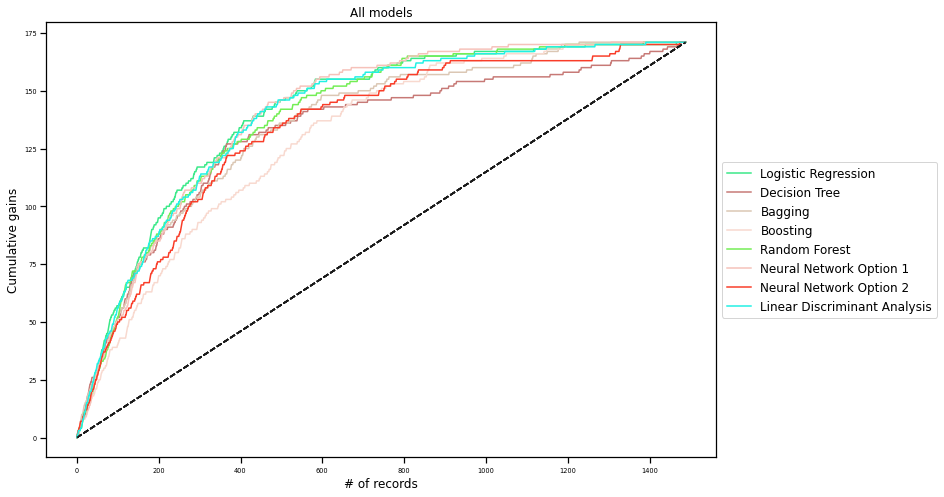

In [62]:
def modelGainsChart(model, title, ax=None):
    
    result = pd.DataFrame({
        'actual': valid_y,  # use validate set
        'prob': model.predict_proba(valid_X_norm)[:, 1]
    })

    result = result.sort_values(by=['prob'], ascending=False).reset_index(drop=True)
    
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    
    ax = gainsChart(result.actual, label = title, ax=ax, figsize=[12, 8], color = color)
    ax.set_title(title)
    
    return ax



ax = modelGainsChart(logit_reg, 'Logistic Regression')
modelGainsChart(dTree, 'Decision Tree', ax)
modelGainsChart(bagging, 'Bagging', ax)
modelGainsChart(adaboost, 'Boosting', ax)
modelGainsChart(rf, 'Random Forest', ax)
modelGainsChart(gridSearch, 'Neural Network Option 1', ax)
modelGainsChart(neuralNet2, 'Neural Network Option 2', ax)
modelGainsChart(LDA, 'Linear Discriminant Analysis', ax)

ax.set_title('All models')
ax.set_xlabel('# of records')
ax.set_ylabel('Cumulative gains')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 
Even when all models have significant amount of gains, we want to decide which model(s) have outperformed the others.

### ROC Curve

<Figure size 432x288 with 0 Axes>

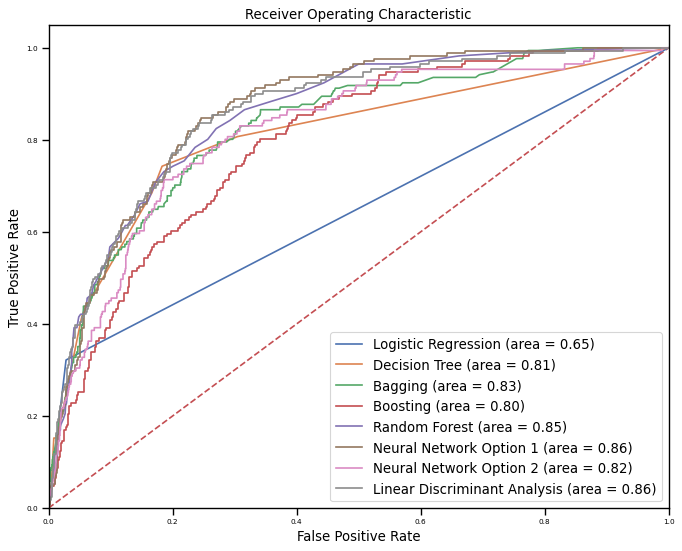

In [40]:
#Logistic Regression
probs_logit_reg = logit_reg.predict_proba(valid_X_norm)
preds_logit_reg = probs_logit_reg[:,1]

# Decision Tree
probs_dTree = dTree.predict_proba(valid_X_norm)
preds_dTree = probs_dTree[:,1]

#Bagging
probs_bagging = bagging.predict_proba(valid_X_norm)
preds_bagging = probs_bagging[:,1]

#Boosting
probs_adaboost = adaboost.predict_proba(valid_X_norm)
preds_adaboost = probs_adaboost[:,1]

# Random Forest
probs_rf = rf.predict_proba(valid_X_norm)
preds_rf = probs_rf[:,1]

# Neural Net Option 1 
probs_neuralNet = gridSearch.predict_proba(valid_X_norm)
preds_neuralNet = probs_neuralNet[:,1]

# Neural Net Option 2
probs_neuralNet2 = neuralNet2.predict_proba(valid_X_norm)
preds_neuralNet2 = probs_neuralNet2[:,1]

# LDA
probs_LDA = LDA.predict_proba(valid_X_norm)
preds_LDA = probs_LDA[:,1]


fpr1, tpr1, threshold1 = roc_curve(valid_y, logit_reg.predict(valid_X_norm))
fpr2, tpr2, threshold2 = metrics.roc_curve(valid_y, preds_dTree)
fpr3, tpr3, threshold3 = metrics.roc_curve(valid_y, preds_bagging)
fpr4, tpr4, threshold4 = metrics.roc_curve(valid_y, preds_adaboost)
fpr5, tpr5, threshold5 = metrics.roc_curve(valid_y, preds_rf)
fpr6, tpr6, threshold6 = metrics.roc_curve(valid_y, preds_neuralNet)
fpr7, tpr7, threshold7 = metrics.roc_curve(valid_y, preds_neuralNet2)
fpr8, tpr8, threshold8 = metrics.roc_curve(valid_y, preds_LDA)


logit_reg_roc_auc = metrics.auc(fpr1, tpr1)
dTree_roc_auc = metrics.auc(fpr2, tpr2)
bagging_roc_auc = metrics.auc(fpr3, tpr3)
adaboost_roc_auc = metrics.auc(fpr4, tpr4)
rf_roc_auc = metrics.auc(fpr5, tpr5)
neuralNet_roc_auc = metrics.auc(fpr6, tpr6)
neuralNet2_roc_auc = metrics.auc(fpr7, tpr7)
LDA_roc_auc = metrics.auc(fpr8, tpr8)

plt.figure()
figure(figsize=(10, 8), dpi=80)
plt.plot([0, 1], [0, 1],'r--')


plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % logit_reg_roc_auc)
plt.plot(fpr2, tpr2, label = 'Decision Tree (area = %0.2f)' % dTree_roc_auc)
plt.plot(fpr3, tpr3, label = 'Bagging (area = %0.2f)' % bagging_roc_auc)
plt.plot(fpr4, tpr4, label = 'Boosting (area = %0.2f)' % adaboost_roc_auc)
plt.plot(fpr5, tpr5, label = 'Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(fpr6, tpr6, label = 'Neural Network Option 1 (area = %0.2f)' % neuralNet_roc_auc)
plt.plot(fpr7, tpr7, label = 'Neural Network Option 2 (area = %0.2f)' % neuralNet2_roc_auc)
plt.plot(fpr8, tpr8, label = 'Linear Discriminant Analysis (area = %0.2f)' % LDA_roc_auc)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Initial comments: 
Random Forest, Neural Network and Linear Discriminant Analysis are the top 3 performed models with the highest ROC-AUC of 0.85, 0.86 and 0.86. Logistic Regression has the worst performance due to its sensitivity to imbalanced classes.
# 

In [41]:
# compare predictions using valid set to the true records

valid_pred = rf.predict(valid_X)

valid['Final Predictions'] = valid_pred

# count of "0" in the test set
count_0_true = (valid['deposit'] == 0).sum()

# count of "0" predicted
count_0_pred = (valid['Final Predictions'] == 0).sum()


# count of "1" in the test set
count_1_true = (valid['deposit'] == 1).sum()

# count of "1" in prediction
count_1_pred = (valid['Final Predictions'] == 1).sum()

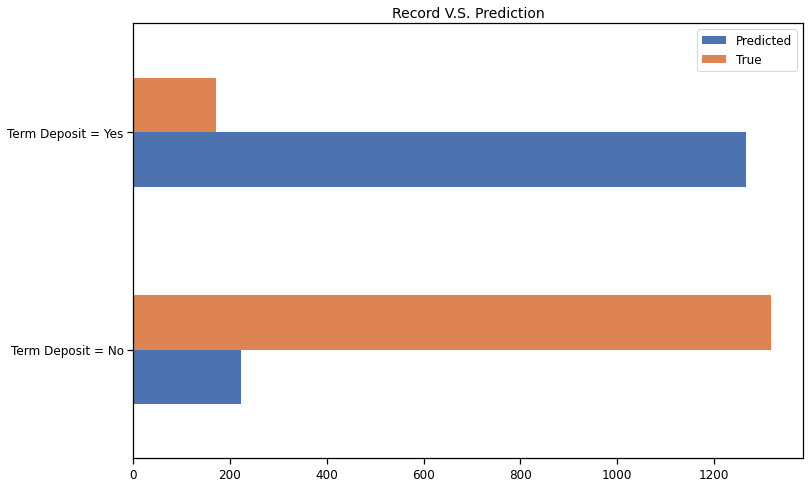

In [42]:
# use horizontal barchart to visualize the difference

predict = [count_0_pred, count_1_pred]
true = [count_0_true, count_1_true]
index = ['Term Deposit = No', 'Term Deposit = Yes']
df = pd.DataFrame({'Predicted': predict,
                   'True': true}, index=index)



ax = df.plot.barh(figsize=[12, 8], fontsize=12)
ax.set_title('Record V.S. Prediction', fontsize=14)
leg = ax.legend()

## Next Steps: Drop Variables, Balance Dataset, Re-Run Models

### Data Pre-Processing

# 

#### Multiple ways of checking and selecting variables:
- Stepwise Regression
- Random Forest Feature Importance 
- Decision Tree Labeling

In [43]:
#Input Stepwise Regressions to determine what to drop. ----- Logistic Regression

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LogisticRegressionCV(penalty="l2", solver='saga', cv=5, max_iter=5000)
    return model.fit(train_X[variables], train_y)

def score_model(model, variables):
    if len(variables) == 0:
        return 0
    logit_reg_valid = model.predict(valid_X[variables])
    return -accuracy_score(valid_y, [1 if p > 0.5 else 0 for p in logit_reg_valid])

logreg_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, 
                                           direction='forward', verbose=True)
print(best_variables)
logreg_model_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.00, constant
Step: score=-0.89, add age
Step: score=-0.89, unchanged None
['age']


In [44]:
#Input Stepwise Regressions to determine what to drop. ----- Linear Regression

from sklearn.linear_model import LinearRegression

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    return model.fit(train_X[variables], train_y)

def score_model(model, variables):
    if len(variables) == 0:
        return 0
    logit_reg_valid = model.predict(valid_X[variables])
    return -accuracy_score(valid_y, [1 if p > 0.5 else 0 for p in logit_reg_valid])

logreg_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, 
                                           direction='forward', verbose=True)
print(best_variables)
logreg_model_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.00, constant
Step: score=-0.89, add age
Step: score=-0.89, add duration
Step: score=-0.89, unchanged None
['age', 'duration']


In [58]:
#Input Random Forest feature importance to determine what to keep. ----- Random Forest

from sklearn.feature_selection import SelectFromModel

# Print the name and gini importance of each feature
for feature in zip(predictors, rf.feature_importances_):
    print(feature)


# SelectFromModel help select the features whose importance 
# is greater than the mean importance of all the features by default

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(train_X_norm, train_y)


selected_feat= train_X.columns[(sel.get_support())]
print()
print('The important features are: ', selected_feat)

('age', 0.012261094218741836)
('education', 0.0508659793513932)
('default', 0.0026576631110499832)
('balance', 0.16877506567883654)
('housing', 0.029341447378572905)
('loan', 0.014488470245389105)
('contact', 0.03291207365015073)
('day', 0.010303424125630034)
('month', 0.06671291090984775)
('duration', 0.3565153485125331)
('campaign', 0.0630506139846088)
('pdays', 0.014227829749776832)
('previous', 0.050199014054255364)
('poutcome', 0.05509142957474746)
('job_Employed', 0.009135289304166922)
('job_Self-employed', 0.004271198784482707)
('job_Unemployed', 0.010902435385316775)
('marital_divorced', 0.01171766228442737)
('marital_married', 0.019425257987190858)
('marital_single', 0.01714579170888179)

The important features are:  Index(['balance', 'month', 'duration', 'campaign', 'poutcome'], dtype='object')


[Text(674.25, 757.1571428571428, 'duration <= 1.499\ngini = 0.208\nsamples = 1700\nvalue = [1500, 200]\nclass = 0'),
 Text(418.5, 640.6714285714286, 'pdays <= 0.846\ngini = 0.15\nsamples = 1567\nvalue = [1439, 128]\nclass = 0'),
 Text(186.0, 524.1857142857143, 'duration <= 0.305\ngini = 0.097\nsamples = 1289\nvalue = [1223, 66]\nclass = 0'),
 Text(93.0, 407.7, 'gini = 0.064\nsamples = 1087\nvalue = [1051, 36]\nclass = 0'),
 Text(279.0, 407.7, 'gini = 0.253\nsamples = 202\nvalue = [172, 30]\nclass = 0'),
 Text(651.0, 524.1857142857143, 'poutcome <= -1.073\ngini = 0.347\nsamples = 278\nvalue = [216, 62]\nclass = 0'),
 Text(465.0, 407.7, 'duration <= -0.036\ngini = 0.236\nsamples = 234\nvalue = [202, 32]\nclass = 0'),
 Text(372.0, 291.21428571428567, 'gini = 0.121\nsamples = 155\nvalue = [145, 10]\nclass = 0'),
 Text(558.0, 291.21428571428567, 'education <= 0.261\ngini = 0.402\nsamples = 79\nvalue = [57, 22]\nclass = 0'),
 Text(465.0, 174.7285714285714, 'gini = 0.249\nsamples = 48\nvalue 

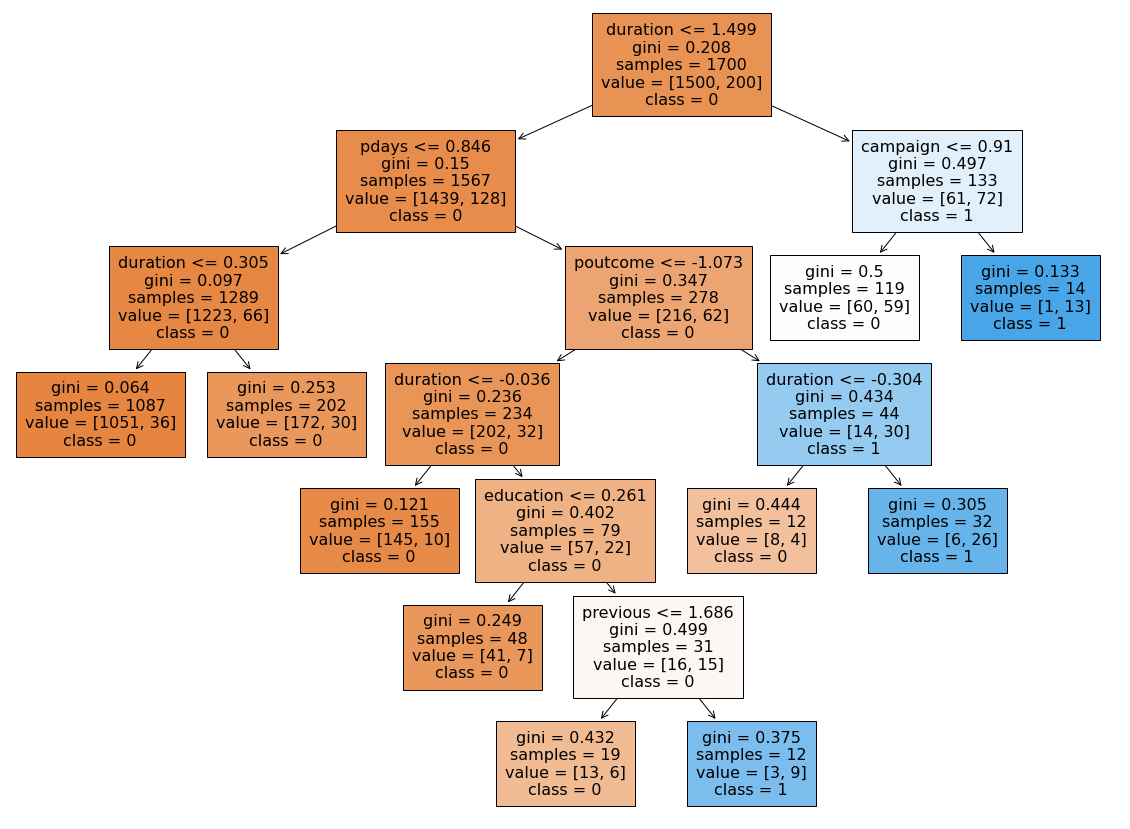

In [46]:
# plot Classification Tree to see what features are used ---------- Decision Tree

from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dTree,
          feature_names = train_X.columns, 
          class_names = train_y.astype(str).unique(),
          filled=True
          )

    'duration', 'previous', 'campaign', 'poutcome', 'education' to keep.

### Final Variables Selection

The variables that have been chosen to be used in the test set:

- 'education'
- 'duration' 
- 'campaign' 
- 'poutcome'
    
Since Random Forest is an ensemble of unpruned classification or regression trees and more robust feature to noise, we want to combine with the labeling used from our classification tree, and choose the common variables found by both models.

In [47]:
final_predictiors = ['education', 'duration', 'campaign', 'poutcome']

test_X = test[final_predictiors]
test_y = test['deposit']

# standardize the data
test_X_norm = StandardScaler().fit_transform(test_X)

In [48]:
# ConfusionMatrics Functions for test set

def confusionMatrices(model, title):
    print(title + ' - test results')
    test_pred = model.predict(test_X)
    classificationSummary(test_y, test_pred)

In [49]:
# Logistic Regression

logit_reg_test = LogisticRegressionCV(penalty="l2", solver='lbfgs', cv = 5, max_iter = 5000)
logit_reg_test.fit(test_X_norm, test_y)

print()
print(confusionMatrices(logit_reg_test, 'Logistic regression'))


# Classification Tree

dTree_test = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 30, max_leaf_nodes = 10)
dTree_test.fit(test_X_norm, test_y)

print()
print(confusionMatrices(dTree_test, 'Decision Tree'))


# Bagging

bagging_test = BaggingClassifier(dTree_test, max_samples = 0.5, max_features = 0.5)
bagging_test.fit(test_X_norm, test_y)

print()
print(confusionMatrices(bagging_test, 'Bagged Decision Tree'))


# Adaboost

adaboost_test = AdaBoostClassifier(n_estimators = 100, base_estimator = dTree_test)
adaboost_test.fit(test_X_norm, test_y)

print()
print(confusionMatrices(adaboost_test, 'Boosted Decision Tree'))

# Random Forest

rf_test = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf_test.fit(test_X_norm, test_y)

print()
print(confusionMatrices(rf_test, 'Random Forest Classifier'))


# Neural Network -- Option 1

param_grid = {
    'hidden_layer_sizes': list(range(2, 10)),
}
neuralNet1_test = MLPClassifier(activation = 'logistic', solver = 'lbfgs', random_state = 1, max_iter = 5000)

gridSearch_test = GridSearchCV(neuralNet1_test, param_grid, cv = 5, n_jobs = -1)
gridSearch_test.fit(test_X_norm, test_y)
neuralNet1_test = gridSearch_test.best_estimator_

print()
print(confusionMatrices(gridSearch_test, 'Neural Network -- Option 1'))


# Neural Network -- Option 2

scaleInput_test = MinMaxScaler()
scaleInput_test.fit(test_X_norm * 1.0)

neuralNet2_test = MLPClassifier(hidden_layer_sizes = (10), activation = 'logistic', solver = 'lbfgs', max_iter = 5000,
                          random_state = 1)
neuralNet2_test.fit(scaleInput_test.transform(test_X_norm), test_y)

print()
print('Neural Network -- Option 2 - test results')
print(classificationSummary(test_y, neuralNet2_test.predict(scaleInput_test.transform(test_X_norm))))


# Linear Discriminant Analysis

LDA_test = LinearDiscriminantAnalysis()
LDA_test.fit(test_X_norm, test_y)

print()
print(confusionMatrices(LDA_test, 'Linear Discriminant Analysis'))


Logistic regression - test results
Confusion Matrix (Accuracy 0.1170)

       Prediction
Actual    0    1
     0    6 1177
     1    0  150
None

Decision Tree - test results
Confusion Matrix (Accuracy 0.1125)

       Prediction
Actual    0    1
     0    0 1183
     1    0  150
None

Bagged Decision Tree - test results
Confusion Matrix (Accuracy 0.3781)

       Prediction
Actual   0   1
     0 418 765
     1  64  86
None

Boosted Decision Tree - test results
Confusion Matrix (Accuracy 0.1125)

       Prediction
Actual    0    1
     0    0 1183
     1    0  150
None

Random Forest Classifier - test results
Confusion Matrix (Accuracy 0.2903)

       Prediction
Actual   0   1
     0 272 911
     1  35 115
None

Neural Network -- Option 1 - test results
Confusion Matrix (Accuracy 0.1253)

       Prediction
Actual    0    1
     0   17 1166
     1    0  150
None

Neural Network -- Option 2 - test results
Confusion Matrix (Accuracy 0.9130)

       Prediction
Actual    0    1
     0 1163  

### Re-Run Evaluation

# 

#### Re-Run Accuracy Score

In [50]:
def accuracy_test(model):
    
    accuracy_test_test = accuracy_score(test_y, model.predict(test_X_norm))
    
    return round(accuracy_test_test,3)

print('accuracy_test score for Logistic Regression is:', accuracy_test(logit_reg_test))
print('accuracy_test score for Decision Tree is:', accuracy_test(dTree_test))
print('accuracy_test score for Bagging is:', accuracy_test(bagging_test))
print('accuracy_test score for Boosting is:', accuracy_test(adaboost_test))
print('accuracy_test score for Random Forest is:', accuracy_test(rf_test))
print('accuracy_test score for Neural Network Option 1 is:', accuracy_test(gridSearch_test))
print('accuracy_test score for Neural Network Option 2 is:', accuracy_test(neuralNet2_test))
print('accuracy_test score for Linear Discriminant Analysis is:', accuracy_test(LDA_test))

accuracy_test score for Logistic Regression is: 0.89
accuracy_test score for Decision Tree is: 0.905
accuracy_test score for Bagging is: 0.89
accuracy_test score for Boosting is: 0.992
accuracy_test score for Random Forest is: 0.992
accuracy_test score for Neural Network Option 1 is: 0.905
accuracy_test score for Neural Network Option 2 is: 0.767
accuracy_test score for Linear Discriminant Analysis is: 0.891


# 
#### Re-Run F1- score

In [51]:
def f1_test(model):
    
    f1_test = f1_score(test_y, model.predict(test_X_norm), average = 'weighted')
    
    return round(f1_test,3)

print('F1 score for Logistic Regression is:', f1_test(logit_reg_test))
print('F1 score for Decision Tree is:', f1_test(dTree_test))
print('F1 score for Bagging is:', f1_test(bagging_test))
print('F1 score for Boosting is:', f1_test(adaboost_test))
print('F1 score for Random Forest is:', f1_test(rf_test))
print('F1 score for Neural Network Option 1 is:', f1_test(gridSearch_test))
print('F1 score for Neural Network Option 2 is:', f1_test(neuralNet2_test))
print('F1 score for Linear Discriminant Analysis is:', f1_test(LDA_test))

F1 score for Logistic Regression is: 0.865
F1 score for Decision Tree is: 0.891
F1 score for Bagging is: 0.84
F1 score for Boosting is: 0.992
F1 score for Random Forest is: 0.992
F1 score for Neural Network Option 1 is: 0.882
F1 score for Neural Network Option 2 is: 0.801
F1 score for Linear Discriminant Analysis is: 0.875


# 
#### Re-Run Gains Charts

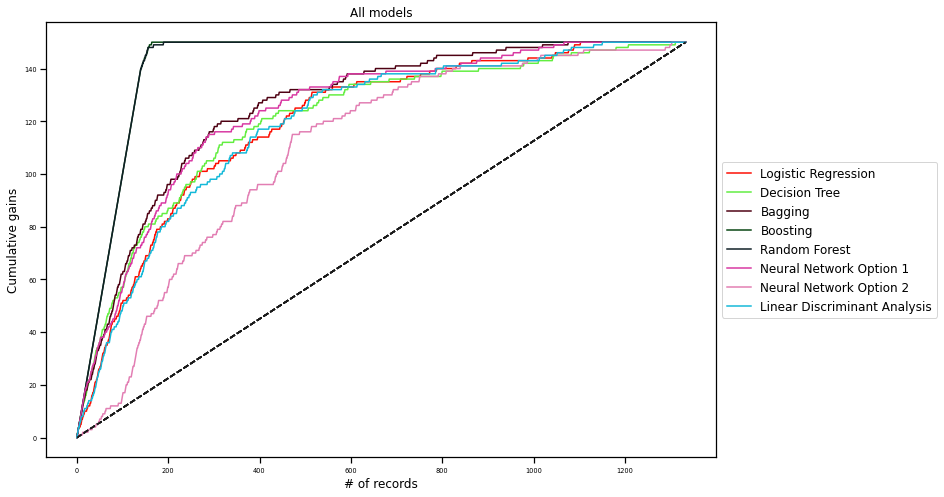

In [52]:
def modelGainsChart(model, title, ax=None):
    
    result = pd.DataFrame({
        'actual': test_y,  # use validate set
        'prob': model.predict_proba(test_X_norm)[:, 1]
    })

    result = result.sort_values(by=['prob'], ascending=False).reset_index(drop=True)
    
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    
    ax = gainsChart(result.actual, label = title, ax=ax, figsize=[12, 8], color = color)
    ax.set_title(title)
    
    return ax



ax = modelGainsChart(logit_reg_test, 'Logistic Regression')
modelGainsChart(dTree_test, 'Decision Tree', ax)
modelGainsChart(bagging_test, 'Bagging', ax)
modelGainsChart(adaboost_test, 'Boosting', ax)
modelGainsChart(rf_test, 'Random Forest', ax)
modelGainsChart(gridSearch_test, 'Neural Network Option 1', ax)
modelGainsChart(neuralNet2_test, 'Neural Network Option 2', ax)
modelGainsChart(LDA_test, 'Linear Discriminant Analysis', ax)

ax.set_title('All models')
ax.set_xlabel('# of records')
ax.set_ylabel('Cumulative gains')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 
#### Re-Run ROC Curves

<Figure size 432x288 with 0 Axes>

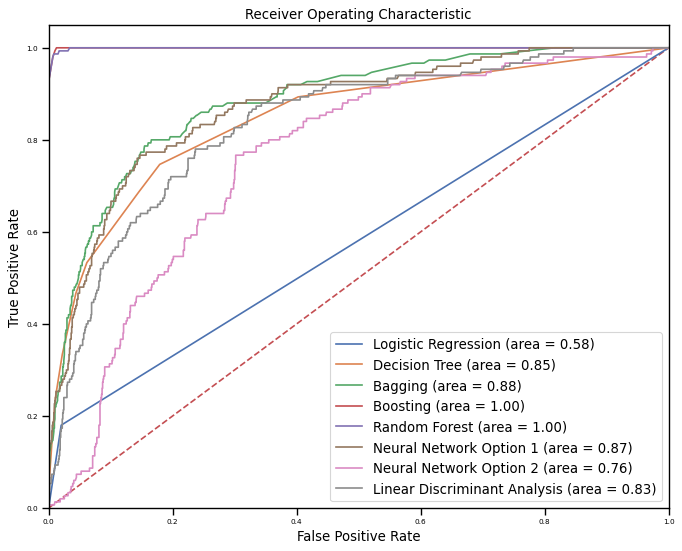

In [53]:
#Logistic Regression
probs_logit_reg_test = logit_reg_test.predict_proba(test_X_norm)
preds_logit_reg_test = probs_logit_reg_test[:,1]

# Decision Tree
probs_dTree_test = dTree_test.predict_proba(test_X_norm)
preds_dTree_test = probs_dTree_test[:,1]

#Bagging
probs_bagging_test = bagging_test.predict_proba(test_X_norm)
preds_bagging_test = probs_bagging_test[:,1]

#Boosting
probs_adaboost_test = adaboost_test.predict_proba(test_X_norm)
preds_adaboost_test = probs_adaboost_test[:,1]

# Random Forest
probs_rf_test = rf_test.predict_proba(test_X_norm)
preds_rf_test = probs_rf_test[:,1]

# Neural Net Option 1 
probs_neuralNet_test = gridSearch_test.predict_proba(test_X_norm)
preds_neuralNet_test = probs_neuralNet_test[:,1]

# Neural Net Option 2
probs_neuralNet2_test = neuralNet2_test.predict_proba(test_X_norm)
preds_neuralNet2_test = probs_neuralNet2_test[:,1]

# LDA
probs_LDA_test = LDA_test.predict_proba(test_X_norm)
preds_LDA_test = probs_LDA_test[:,1]


fpr1, tpr1, threshold1 = roc_curve(test_y, logit_reg_test.predict(test_X_norm))
fpr2, tpr2, threshold2 = metrics.roc_curve(test_y, preds_dTree_test)
fpr3, tpr3, threshold3 = metrics.roc_curve(test_y, preds_bagging_test)
fpr4, tpr4, threshold4 = metrics.roc_curve(test_y, preds_adaboost_test)
fpr5, tpr5, threshold5 = metrics.roc_curve(test_y, preds_rf_test)
fpr6, tpr6, threshold6 = metrics.roc_curve(test_y, preds_neuralNet_test)
fpr7, tpr7, threshold7 = metrics.roc_curve(test_y, preds_neuralNet2_test)
fpr8, tpr8, threshold8 = metrics.roc_curve(test_y, preds_LDA_test)


logit_reg_roc_auc = metrics.auc(fpr1, tpr1)
dTree_roc_auc = metrics.auc(fpr2, tpr2)
bagging_roc_auc = metrics.auc(fpr3, tpr3)
adaboost_roc_auc = metrics.auc(fpr4, tpr4)
rf_roc_auc = metrics.auc(fpr5, tpr5)
neuralNet_roc_auc = metrics.auc(fpr6, tpr6)
neuralNet2_roc_auc = metrics.auc(fpr7, tpr7)
LDA_roc_auc = metrics.auc(fpr8, tpr8)

plt.figure()
figure(figsize=(10, 8), dpi=80)
plt.plot([0, 1], [0, 1],'r--')


plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % logit_reg_roc_auc)
plt.plot(fpr2, tpr2, label = 'Decision Tree (area = %0.2f)' % dTree_roc_auc)
plt.plot(fpr3, tpr3, label = 'Bagging (area = %0.2f)' % bagging_roc_auc)
plt.plot(fpr4, tpr4, label = 'Boosting (area = %0.2f)' % adaboost_roc_auc)
plt.plot(fpr5, tpr5, label = 'Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(fpr6, tpr6, label = 'Neural Network Option 1 (area = %0.2f)' % neuralNet_roc_auc)
plt.plot(fpr7, tpr7, label = 'Neural Network Option 2 (area = %0.2f)' % neuralNet2_roc_auc)
plt.plot(fpr8, tpr8, label = 'Linear Discriminant Analysis (area = %0.2f)' % LDA_roc_auc)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

    Comments: I think since we choose the variables from random forest, it 'idealizes' or 'perfectionizes' the results for 
    it, thus the maximized gains and perfect ROC-AUC. Let's think about that for a sec.

           

In [54]:
# compare predictions to the true records

final_pred = rf_test.predict(test_X)

test['Final Predictions'] = final_pred

# count of "0" in the test set
count_0_true = (test['deposit'] == 0).sum()

# count of "0" predicted
count_0_pred = (test['Final Predictions'] == 0).sum()


# count of "1" in the test set
count_1_true = (test['deposit'] == 1).sum()

# count of "1" in prediction
count_1_pred = (test['Final Predictions'] == 1).sum()

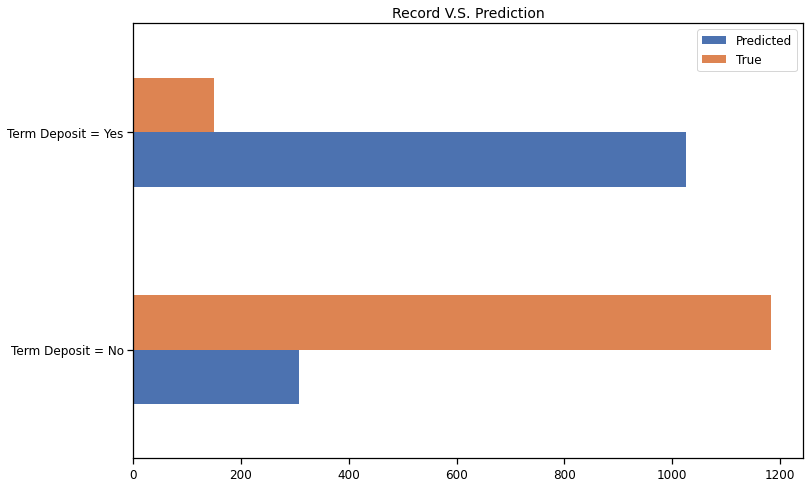

In [55]:
# use horizontal barchart to visualize the difference

predict = [count_0_pred, count_1_pred]
true = [count_0_true, count_1_true]
index = ['Term Deposit = No', 'Term Deposit = Yes']
df = pd.DataFrame({'Predicted': predict,
                   'True': true}, index=index)



ax = df.plot.barh(figsize=[12, 8], fontsize=12)
ax.set_title('Record V.S. Prediction', fontsize=14)
leg = ax.legend()

In [66]:
from tabulate import tabulate
  
# assign data
table = [{"", "Successful Term Deposit", "No Term Deposit"}, 
         {'Record', count_0_true, count_1_true}, 
         {'Prediction',count_0_pred, count_1_pred},
         {'Change %',round(100*(count_0_true - count_0_pred)/count_0_pred,2),
          round(100*(count_1_true - count_1_pred)/count_1_pred,2)}]
  
# display table
print(tabulate(table,  tablefmt="grid"))

+----------+-----------------+-------------------------+
|          | No Term Deposit | Successful Term Deposit |
+----------+-----------------+-------------------------+
| 1183     | 150             | Records                 |
+----------+-----------------+-------------------------+
| 1026     | 307             | Prediction              |
+----------+-----------------+-------------------------+
| Change % | -85.38          | 285.34                  |
+----------+-----------------+-------------------------+
